# Life Expectancy Analysis

In [22]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### First Dataset found at Kaggle.com

In [23]:
Life_Exp_df = pd.read_csv('Resources/Life Expectancy Data - WHO.csv')

Life_Exp_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


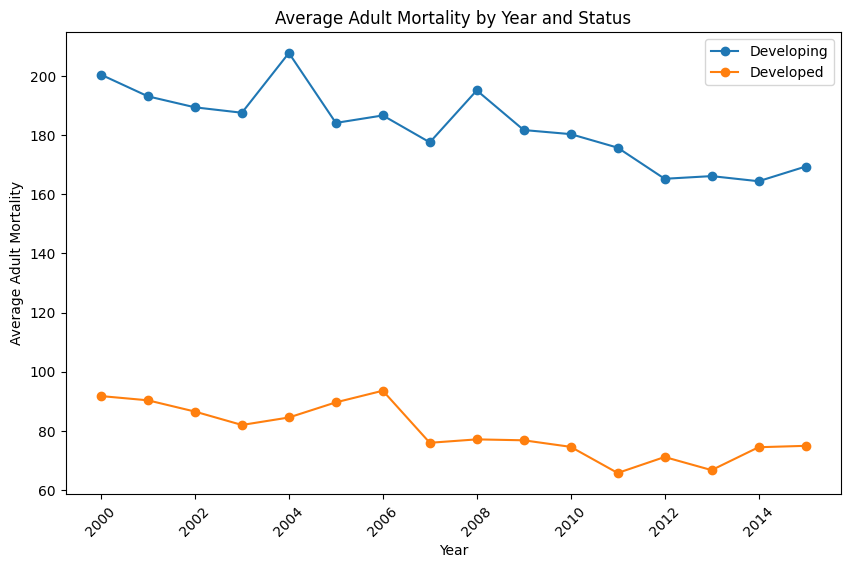

In [30]:

# Grouping by 'Year' and 'Status' and calculating average life expectancy
grouped_df = Life_Exp_df.groupby(['Year', 'Status'])['Adult Mortality'].mean().reset_index()

# Splitting the data based on 'Status'
developing_df = grouped_df[grouped_df['Status'] == 'Developing']
developed_df = grouped_df[grouped_df['Status'] == 'Developed']

# Creating the line chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Line plot for 'Developing' status
plt.plot(developing_df['Year'], developing_df['Adult Mortality'], label='Developing', marker='o')

# Line plot for 'Developed' status
plt.plot(developed_df['Year'], developed_df['Adult Mortality'], label='Developed', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Adult Mortality')
plt.title('Average Adult Mortality by Year and Status')
plt.legend()
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed

plt.show()


### Access World Health Organization's data directly using 'GHO' API

In [45]:

# Retrieving the list of available dimensions
# Simply specifying the /api/DIMENSION URL will provide you with the list of available dimension codes. 
# The default result is returned in the Observatory's XML schema. 

url = "https://ghoapi.azureedge.net/api/Dimension/COUNTRY"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

data

{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#DIMENSION/$entity',
 'Code': 'COUNTRY',
 'Title': 'Countries, territories and areas'}

In [47]:
# Attempt to request specific data

base_url = "https://frontdoor-r5quteqglawbs.azurefd.net/HEM/"

response = requests.get(base_url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

data

{'@odata.context': 'https://xmart-api-public-uat.who.int/HEM/$metadata',
 'value': [{'name': 'rep_covid_cfr',
   'kind': 'EntitySet',
   'url': 'rep_covid_cfr'},
  {'name': 'rep_covid_rate', 'kind': 'EntitySet', 'url': 'rep_covid_rate'},
  {'name': 'rep_ctis1', 'kind': 'EntitySet', 'url': 'rep_ctis1'},
  {'name': 'rep_ctis2', 'kind': 'EntitySet', 'url': 'rep_ctis2'},
  {'name': 'rep_ctis3', 'kind': 'EntitySet', 'url': 'rep_ctis3'},
  {'name': 'rep_dhs_ahn', 'kind': 'EntitySet', 'url': 'rep_dhs_ahn'},
  {'name': 'rep_dhs_hca', 'kind': 'EntitySet', 'url': 'rep_dhs_hca'},
  {'name': 'rep_dhs_unicef_cpr',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_cpr'},
  {'name': 'rep_dhs_unicef_hiv',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_hiv'},
  {'name': 'rep_dhs_unicef_malaria',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_malaria'},
  {'name': 'rep_dhs_unicef_sdh',
   'kind': 'EntitySet',
   'url': 'rep_dhs_unicef_sdh'},
  {'name': 'rep_dtp_sub', 'kind': 'EntitySet', 'url': 'r

In [55]:
# append dataset url to end of base_url

data_url = base_url + "rep_gho_tobacco"

response = requests.get(data_url)

if response.status_code == 200:
    data = response.json()
else:
    print("Failed to fetch data. Status code:", response.status_code)

print(data_url)

data



https://frontdoor-r5quteqglawbs.azurefd.net/HEM/rep_gho_tobacco


{'@odata.context': 'https://xmart-api-public-uat.who.int/HEM/$metadata#rep_gho_tobacco',
 'value': [{'ci_lb': None,
   'ci_ub': None,
   'dataset_id': 'rep_gho_tobacco',
   'date': '2018',
   'dimension': 'Sex',
   'estimate': 13.0,
   'favourable_indicator': 0,
   'flag': None,
   'indicator_abbr': 'Adult_curr_cig_smoking',
   'indicator_name': 'Current cigarette smoking among adults (%)',
   'indicator_scale': 100,
   'iso3': 'CRI',
   'ordered_dimension': 0,
   'population': None,
   'reference_subgroup': 1,
   'se': None,
   'setting': 'Costa Rica',
   'setting_average': 8.69999980926514,
   'source': 'WHO Global Health Observatory',
   'subgroup': 'Male',
   'subgroup_order': 0,
   'update': '1 March 2023',
   'wbincome2022': 'Upper middle income',
   'whoreg6': 'Americas',
   '_RecordID': '07923e71-3193-4a3f-8a77-6f6e69008605',
   'Sys_PK': -2147483648,
   'Sys_RowTitle': '-',
   'Sys_Version': 1,
   'Sys_VersionID': '07923E71-3193-4A3F-8A77-6F6E69008605.1',
   'Sys_OriginCode': 